In [10]:
import micropip

await micropip.install('pandas')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

## Read the DATA

In [2]:
from js import fetch

# Lets download typical chemoinformatics dataset
URL = "https://raw.githubusercontent.com/kamclar/examples/main/VEGF2_ChEMBL28_10980_pic50.csv"
res = await fetch(URL)
text = await res.text()
filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

df = pd.read_csv(filename)
df.head()

,tid,cmpd_chembl_id,canonical_smiles,standard_type,value,confidence_score,cmpd_pref_name,activity_comment
0,10980,CHEMBL356626,CCCOCc1ccc2c(c1)c1c3c(c4c(c1n2CCCO)Cc1ccccc1-4...,pIC50,7.89,8,NaN,NaN
1,10980,CHEMBL4278922,O=C(Nc1ccc(Nc2ncnc3sc4c(c23)CCCC4)cc1)Nc1ccc(C...,pIC50,6.70,9,NaN,NaN
2,10980,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN1CCOCC1,pIC50,6.60,8,NaN,NaN
3,10980,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1,pIC50,8.22,9,NaN,NaN
4,10980,CHEMBL3754450,COc1cccc(C(=O)CN2CCN(c3nnc(-c4ccccc4)c4ccccc34...,pIC50,5.47,9,NaN,NaN


## EXPLORATORY ANALYSIS

In [28]:
print('Dataframe shape: ', df.shape)

Dataframe shape:  (7230, 8)


In [31]:
print('Dataframe types: ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tid               7230 non-null   int64  
 1   cmpd_chembl_id    7230 non-null   object 
 2   canonical_smiles  7230 non-null   object 
 3   standard_type     7230 non-null   object 
 4   value             7230 non-null   float64
 5   confidence_score  7230 non-null   int64  
 6   cmpd_pref_name    130 non-null    object 
 7   activity_comment  1286 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 339.0+ KB
Dataframe types:  None


In [32]:
print('Dataframe summary statistics: ', df.describe())

Dataframe summary statistics:             tid        value  confidence_score  activity_comment
count   7230.0  7230.000000       7230.000000       1286.000000
mean   10980.0     6.831284          8.661411     312543.807932
std        0.0     1.098586          0.473263      83144.642487
min    10980.0     4.000000          8.000000       6364.000000
25%    10980.0     6.020000          8.000000     259751.250000
50%    10980.0     6.900000          9.000000     266680.500000
75%    10980.0     7.665000          9.000000     410041.750000
max    10980.0     9.850000          9.000000     436754.000000


## Visualization

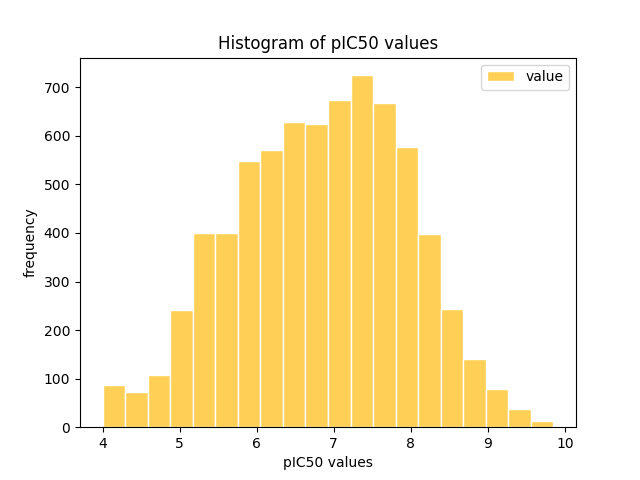

In [5]:
kwargs ={'edgecolor':'white',}
df.value.hist(bins=20,grid=False,legend=True,color='#FFCF56',**kwargs)
plt.xlabel('pIC50 values')
plt.ylabel('frequency')
plt.title('Histogram of pIC50 values')
plt.show()

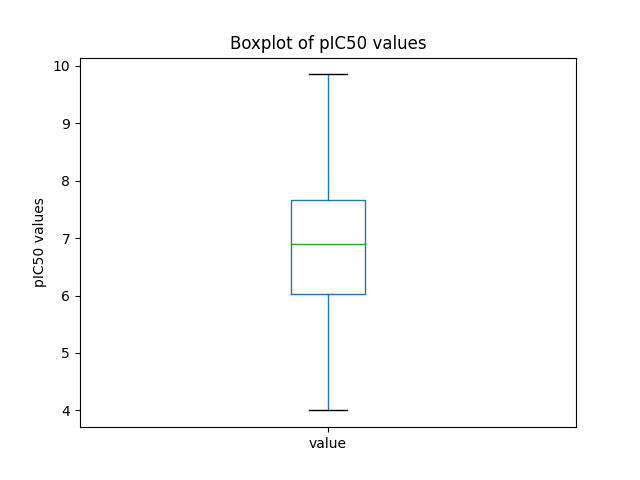

In [7]:
df.boxplot('value',grid=False)
#plt.xlabel('column value')
plt.ylabel('pIC50 values')
plt.title('Boxplot of pIC50 values')
plt.show()

## Dataspace Visualization

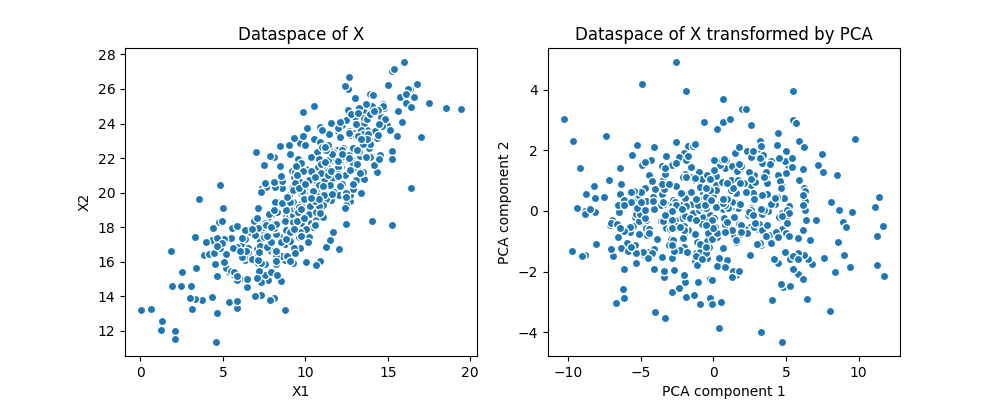

In [18]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(10,4))

# Generate small dataset
n = 500
mean = np.array([10, 20])
cov = np.array([[10, 8], [8, 10]])
X = np.random.multivariate_normal(mean, cov, size=n)

# let's transform it by PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(X)

# Plot the X before and after transformation
# Notice the centering of the transformed dataset
plt.subplot(121)

plt.scatter(X[:,0], X[:,1], **kwargs)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataspace of X')

plt.subplot(122)
plt.scatter(embedding[:,0], embedding[:,1], **kwargs)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Dataspace of X transformed by PCA')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# let's transform it by TSNE
embedding = TSNE(n_components=2).fit_transform(X)


In [ ]:
# Plot the X before and after transformation
plt.subplot(121)

plt.scatter(X[:,0], X[:,1])
plt.title('Dataspace of X')

plt.subplot(122)
plt.scatter(embedding[:,0], embedding[:,1])
plt.title('Dataspace of X transformed by TSNE')
plt.show()

### Correlation

In [ ]:
# Create regression datasets
X, y = datasets.make_regression(n_samples=500, n_features=6, n_informative=2, random_state=0)

df = pd.DataFrame(X)
df.columns = ['col 1', 'col 2', 'col 3', 'col 4', 'col 5', 'col 6']
df['label'] = y

corr = df.corr()

# Plot the correlation heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)